# Exploratory Data Analysis of Heart Disease Dataset - MLC

This document presents an Exploratory Data Analysis (EDA) of a dataset related to heart disease. 

The goal of this analysis is to understand the distribution of features, identify potential relationships between features and the target variable (presence of heart disease), and gain insights that can be used for building a machine learning model to predict heart disease.


In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file paths
heart = "heart.csv"
heart_df = pd.read_csv(heart)
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [202]:
print("shape of the data:", heart_df.shape)
heart_df.info()

shape of the data: (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [203]:
heart_df["HeartDisease"].value_counts()
heart_df['HeartDisease'].value_counts()/len(heart_df)*100

HeartDisease
1    55.338
0    44.662
Name: count, dtype: float64

### Numeric Data

In [204]:
##Selecting numerical features
numerical_data = heart_df.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


### Categorical Data

In [205]:
#Selecting categoricalfeatures
categorical_data=heart_df.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 5 numerical features: 

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### Summary Statistics of Numeric Data

In [206]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.511,9.433,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.397,18.514,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.800,109.384,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233,0.423,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809,25.460,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887,1.067,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553,0.497,0.0,0.00,1.0,1.0,1.0


Min RestingBP, Cholesterol are 0 - Is this erroneous data?

In [207]:
numerical_data.nunique()

Age              50
RestingBP        67
Cholesterol     222
FastingBS         2
MaxHR           119
Oldpeak          53
HeartDisease      2
dtype: int64

In [208]:
columns = ('Cholesterol', 'RestingBP')

for col in columns:
    error = (heart_df[col] == 0).sum()
    print(f"Number of rows where {col} equals 0:", error)


Number of rows where Cholesterol equals 0: 172
Number of rows where RestingBP equals 0: 1


Cholesterol would never be 0 so data was either not collected/ recorded/ has been ommitted accidentally or on purpose. 

In [209]:
# Count number of rows where Cholesterol = 0 and HeartDisease = 0
cholesterol_0_heart_disease_0 = ((heart_df["Cholesterol"] == 0) & (heart_df["HeartDisease"] == 0)).sum()
print("Number of rows where Cholesterol = 0 and HeartDisease = False:", cholesterol_0_heart_disease_0)

# Count number of rows where Cholesterol = 0 and HeartDisease = 1
cholesterol_0_heart_disease_1 = ((heart_df["Cholesterol"] == 0) & (heart_df["HeartDisease"] == 1)).sum()
print("Number of rows where Cholesterol = 0 and HeartDisease = True:", cholesterol_0_heart_disease_1)

print((172/918)*100, "% of the data is affected by the cholesterol = 0 data")


Number of rows where Cholesterol = 0 and HeartDisease = False: 20
Number of rows where Cholesterol = 0 and HeartDisease = True: 152
18.736383442265794 % of the data is affected by the cholesterol = 0 data


### Categorical Data

In [210]:
categorical_data.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


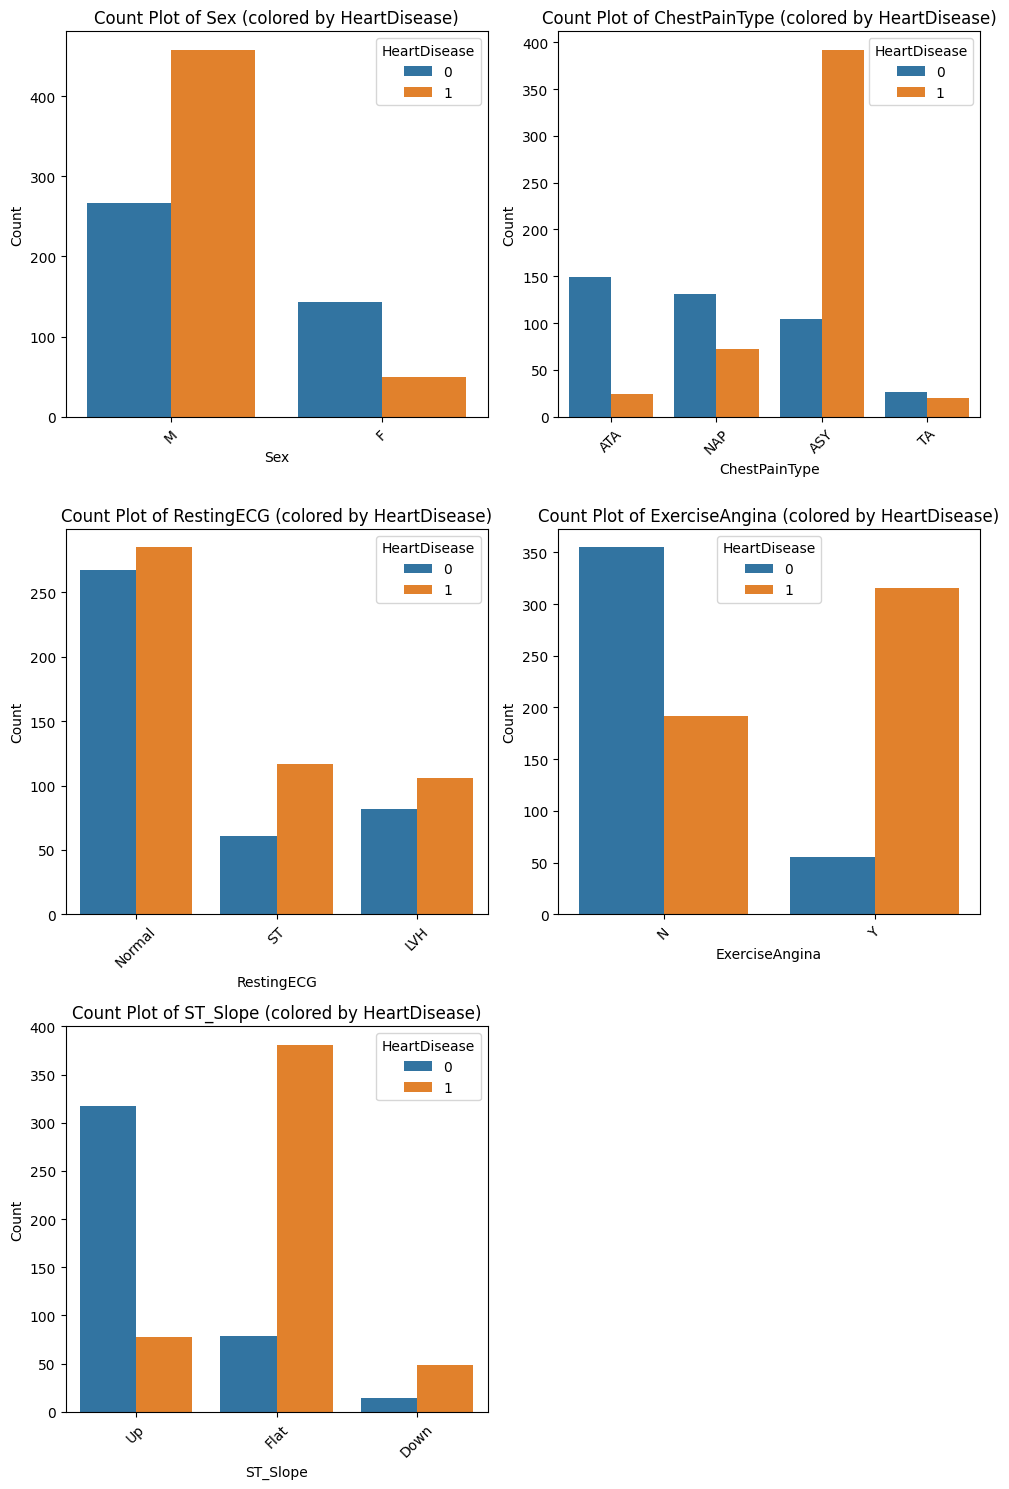

In [211]:
def categorical_countplots(data, hue_col):
    # Select categorical columns
    categorical_cols = data.select_dtypes(include=['object', ]).columns
    
    # Calculate the number of rows and columns for subplots
    num_plots = len(categorical_cols)
    num_rows = (num_plots + 1) // 2  # Calculate number of rows (round up)
    num_cols = 2  # Two plots per row
    
    # Create subplots for count plots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 5))
    axes = axes.flatten()
    
    # Plot count plots for each categorical variable
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=data, x=col, hue=hue_col, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col} (colored by {hue_col})')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].legend(title=hue_col)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    
    # Hide unused subplots
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
categorical_countplots(heart_df, 'HeartDisease')

## Data Description

The data used in this analysis comes from [source of data, if available]. It contains 918 observations (rows) and 19 features (columns). The features include:

* Demographic features (Age, Sex)
* Medical history features (RestingBP, Cholesterol, FastingBS, etc.)
* Results of medical tests (RestingECG, ST_Slope, etc.)
* Target variable (HeartDisease)

All categorical features have been encoded using one-hot encoding.

### Feature Encoding

1. Age (Discrete): Since age is discrete, no further encoding required.
2. Sex (Binary): Convert to binary encoding.
3. ChestPainType (Nominal): One-hot encode the different types of chest pain.
4. RestingBP (Continuous): No further encoding needed.
5. Cholesterol (Continuous): No further encoding needed.
6. FastingBS (Binary): Convert to binary encoding.
7. RestingECG (Nominal): One-hot encode the different types of resting ECG.
8. MaxHR (Continuous): No further encoding needed.
9. ExerciseAngina (Binary): Convert to binary encoding.
10. Oldpeak (Continuous): No further encoding needed.
11. ST_Slope (Nominal): One-hot encode the different types of ST slope.
12. HeartDisease (Boolean): No further encoding needed.

In [212]:
# Convert Sex to binary encoding
heart_df['Sex'] = heart_df['Sex'].map({'M': 1, 'F': 0})
# Convert ExerciseAngina to binary encoding
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].map({'Y': 1, 'N': 0})
# One-hot encode ChestPainType, RestingECG, and ST_Slope
heart_df = pd.get_dummies(heart_df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])
# Convert FastingBS and ExerciseAngina to binary encoding
binary_columns = ['FastingBS', 'ExerciseAngina']
heart_df[binary_columns] = heart_df[binary_columns].astype(bool).astype(int)
# Drop rows where RestingBP equals 0
heart_df = heart_df[heart_df["RestingBP"] != 0]
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   Sex                917 non-null    int64  
 2   RestingBP          917 non-null    int64  
 3   Cholesterol        917 non-null    int64  
 4   FastingBS          917 non-null    int32  
 5   MaxHR              917 non-null    int64  
 6   ExerciseAngina     917 non-null    int32  
 7   Oldpeak            917 non-null    float64
 8   HeartDisease       917 non-null    int64  
 9   ChestPainType_ASY  917 non-null    bool   
 10  ChestPainType_ATA  917 non-null    bool   
 11  ChestPainType_NAP  917 non-null    bool   
 12  ChestPainType_TA   917 non-null    bool   
 13  RestingECG_LVH     917 non-null    bool   
 14  RestingECG_Normal  917 non-null    bool   
 15  RestingECG_ST      917 non-null    bool   
 16  ST_Slope_Down      917 non-null

In [213]:
heart_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


# Visualisations

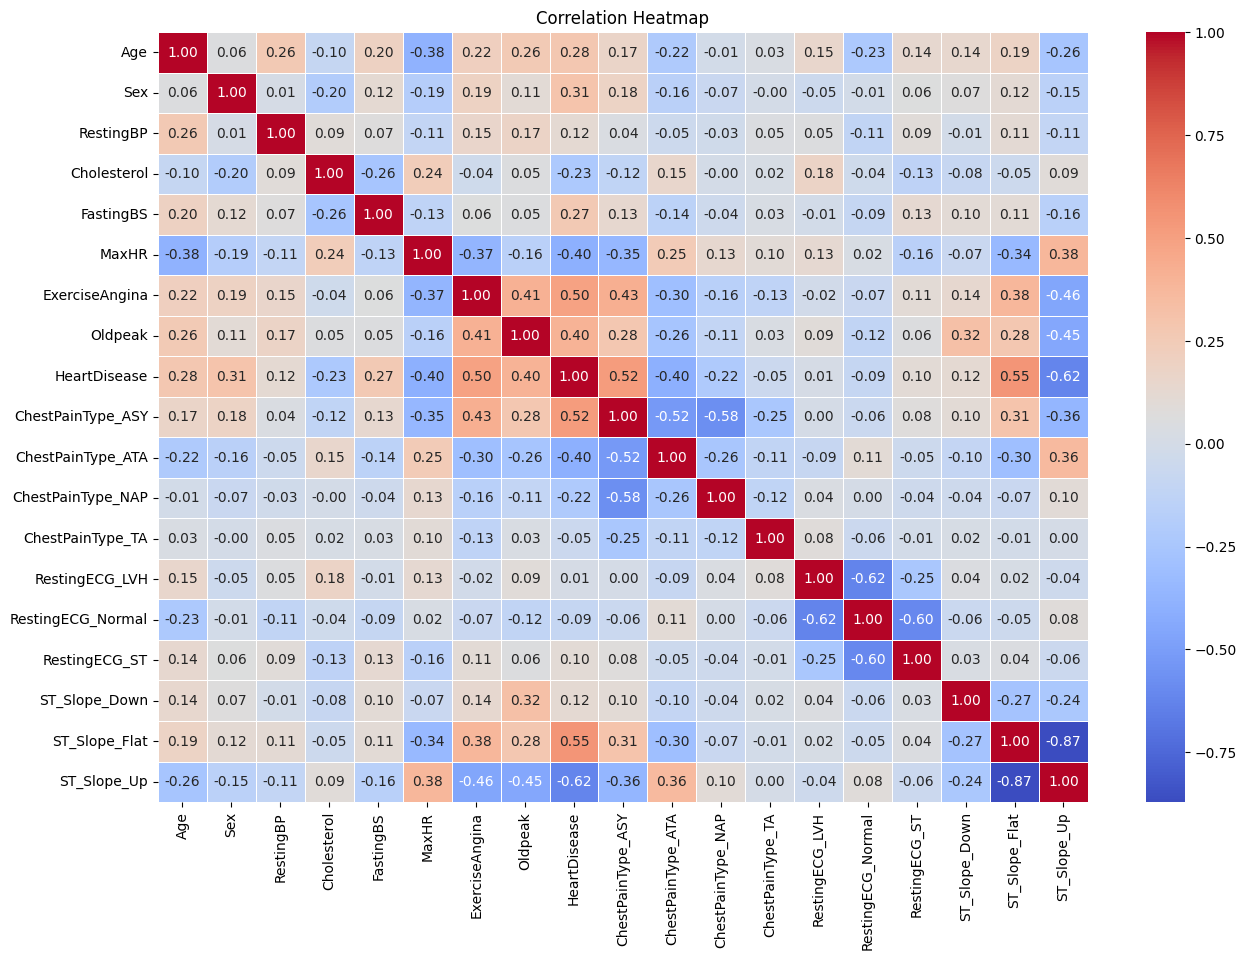

In [214]:
# Correlation matrix
correlation_matrix = heart_df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [221]:
# Print correlation values in a list format
for index, row in correlation_matrix.iterrows():
    for col, value in row.items():
        print(f"Correlation between {index} and {col}: {value:.2f}")

Correlation between Age and Age: 1.00
Correlation between Age and Sex: 0.06
Correlation between Age and RestingBP: 0.26
Correlation between Age and Cholesterol: -0.10
Correlation between Age and FastingBS: 0.20
Correlation between Age and MaxHR: -0.38
Correlation between Age and ExerciseAngina: 0.22
Correlation between Age and Oldpeak: 0.26
Correlation between Age and HeartDisease: 0.28
Correlation between Age and ChestPainType_ASY: 0.17
Correlation between Age and ChestPainType_ATA: -0.22
Correlation between Age and ChestPainType_NAP: -0.01
Correlation between Age and ChestPainType_TA: 0.03
Correlation between Age and RestingECG_LVH: 0.15
Correlation between Age and RestingECG_Normal: -0.23
Correlation between Age and RestingECG_ST: 0.14
Correlation between Age and ST_Slope_Down: 0.14
Correlation between Age and ST_Slope_Flat: 0.19
Correlation between Age and ST_Slope_Up: -0.26
Correlation between Sex and Age: 0.06
Correlation between Sex and Sex: 1.00
Correlation between Sex and Rest

### Attributes with Moderate to strong Correlations
* MaxHR and HeartDisease: -0.40
* ExerciseAngina and HeartDisease: 0.50
* ExerciseAngina and Oldpeak: 0.41
* ExerciseAngina and ChestPainType_ASY: 0.43
* Oldpeak and ExerciseAngina: 0.41
* Oldpeak and HeartDisease: 0.40
* HeartDisease and ChestPainType_ASY: 0.52
* HeartDisease and ChestPainType_ATA: -0.40
* HeartDisease and ST_Slope_Flat: 0.55
* HeartDisease and ST_Slope_Up: -0.62
* ChestPainType_ASY and ChestPainType_ATA: -0.52
* ChestPainType_ASY and ChestPainType_NAP: -0.58
* ChestPainType_ATA and HeartDisease: -0.40
* ChestPainType_NAP and ChestPainType_ASY: -0.58
* ST_Slope_Flat and HeartDisease: 0.55
* ST_Slope_Flat and ST_Slope_Up: -0.87
* ST_Slope_Up and HeartDisease: -0.62
* ST_Slope_Up and ST_Slope_Flat: -0.87

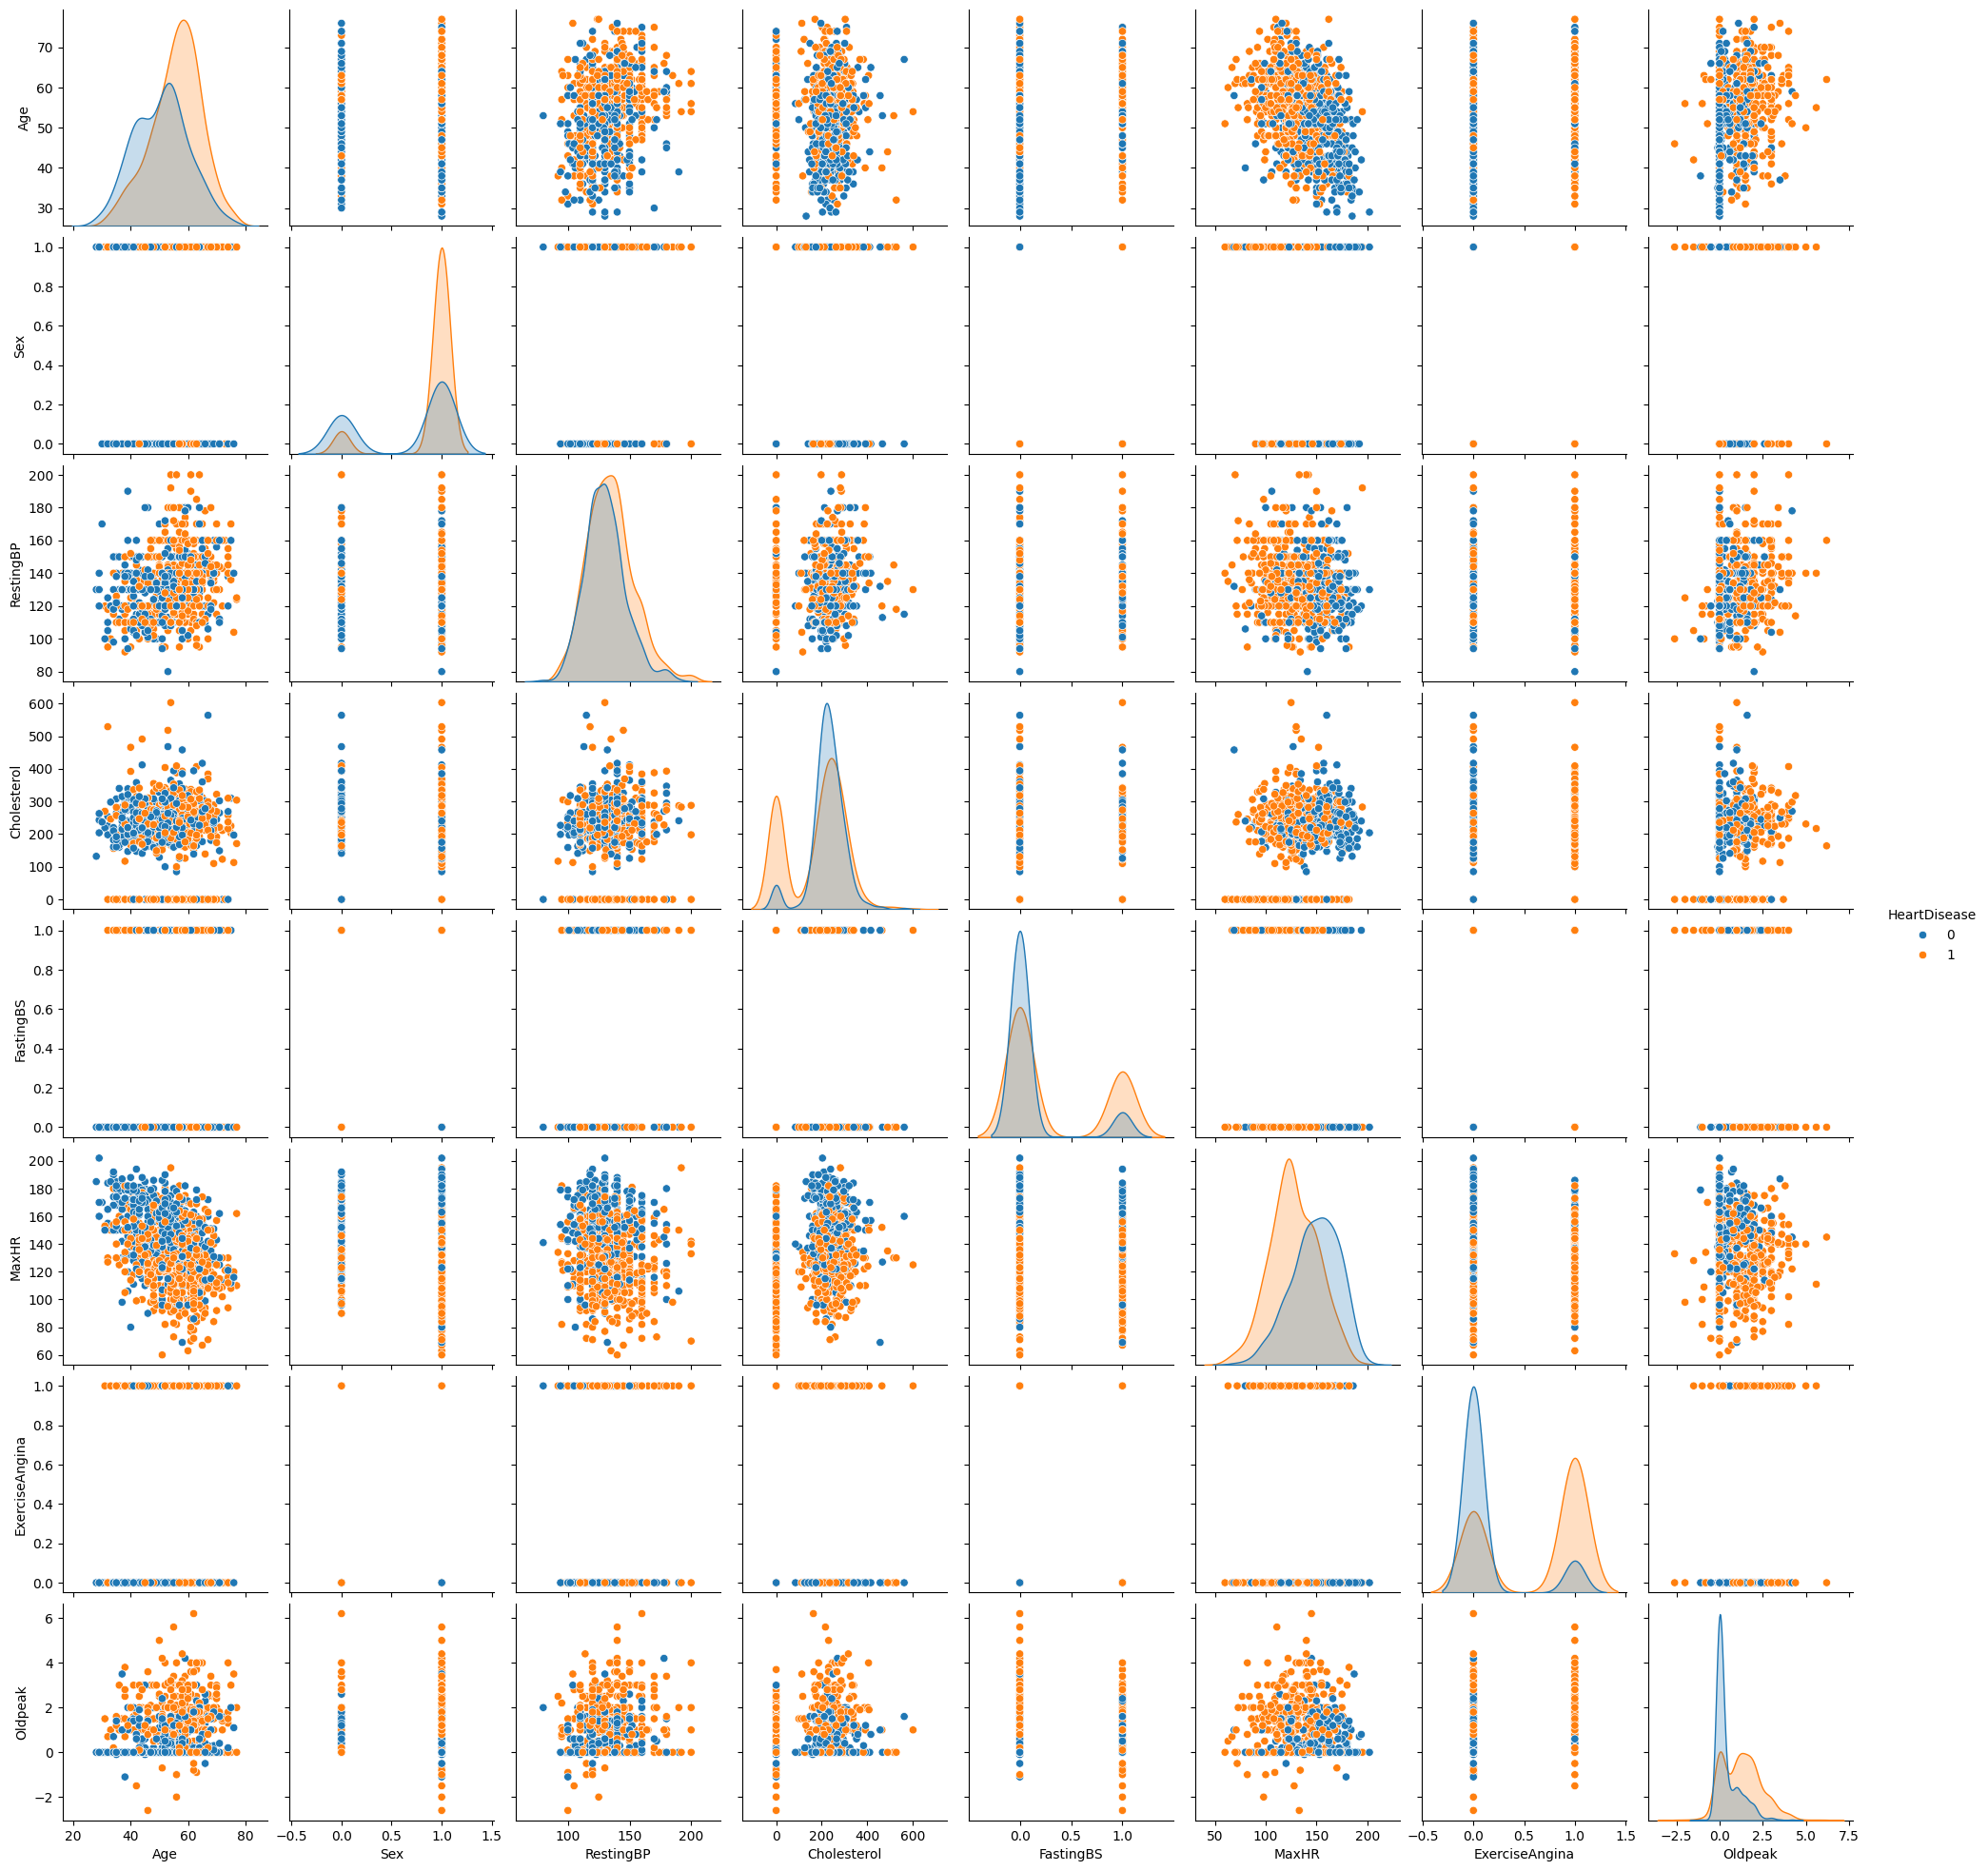

In [217]:
# Select specific columns for pairplot
selected_columns = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease']
selected_df = heart_df[selected_columns]

# Create pairplot
sns.pairplot(data=selected_df, hue='HeartDisease')
plt.show()

### Pairplot Findings


1.	Clustering of Heart Disease Presence: There seems to be a clear clustering of instances where heart disease is present or absent across various attributes, indicating that certain combinations of attribute values may be associated with the presence or absence of heart disease.
2.	MaxHR and Heart Disease: Lower values of MaxHR appear to correlate with the presence of heart disease, suggesting that individuals with lower maximum heart rates might be more likely to have heart disease.
3.	Age and Heart Disease: Higher values of Age appear to correlate with the presence of heart disease, indicating that older individuals might be at a higher risk of developing heart disease.
4.	Exercise Angina and Heart Disease: The presence of exercise-induced angina appears to correlate with the presence of heart disease, suggesting that individuals experiencing exercise-induced angina may have a higher likelihood of having heart disease.
5.	Relationship between Age and MaxHR: The relationship between Age and MaxHR seems logical, as MaxHR is generally calculated as 220 minus a person's age. This relationship appears evident in the data.
6.	Cholesterol = 0 Data Points: The presence of data points where cholesterol equals 0 is noticeable in the plot.
7.	Relationship between Oldpeak and Heart Disease: There seems to be a relationship between Oldpeak (ST depression induced by exercise relative to rest) and the presence of heart disease, which aligns with expectations, as abnormal changes in the ST segment during exercise could indicate underlying heart problems.

